# Carbon Flux ML Model

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
import json
import re

warnings.simplefilter('ignore')

In [11]:

sys.path.append(os.path.abspath("./src"))
import process

In [12]:
akb_csv = r'data\akb.csv'
aku_csv = r'data\aku.csv'
atq_csv = r'data\atq.csv'
bnz_csv = r'data\bnz.csv'
eml_csv = r'data\eml.csv'
imh_csv = r'data\imh.csv'
iml_csv = r'data\iml.csv'
ncb_csv = r'data\ncb.csv'
ncu_csv = r'data\ncu.csv'

In [13]:
site_dict = {'akb': akb_csv, 'aku': aku_csv, 'atq': atq_csv, 'bnz': bnz_csv, 'eml': eml_csv,
             'imh': imh_csv, 'iml': iml_csv, 'Nome_Creek_Burned': ncb_csv, 'Nome_Creek_Unburned': ncu_csv}
era5_features = ['st2', 'le', 'pres', 'h', 'rad', 'airt', 'ppt.roll', 'rh', 'vpd', 'ws']
site_features = ['sm1', 'filledTSOIL1', 'filledTSOIL2']

In [14]:
akb_df = process.read_csv(akb_csv)
akb_df

cant find date index
Index(['FD01_flux', 'FD02_flux', 'FD03_flux', 'Soil_Chamber_CO2_conc_5cm',
       'Soil_Chamber_CO2_conc_15cm', 'Soil_Chamber_CO2_conc_25cm',
       'Soil_Chamber_TEMP_5cm', 'Soil_Chamber_TEMP_15cm',
       'Soil_Chamber_TEMP_25cm', 'Soil_Chamber_TEMP_ATM', 'SoilTemp_15cm_01',
       'SoilTemp_15cm_02', 'VWC15cm_raw_01', 'VWC15cm_raw_02',
       'VWC15cm_cali_01', 'VWC15cm_cali_02', 'site.x', 'VWC15cm_raw_filt_01',
       'VWC15cm_raw_filt_02', 'SoilTemp_15cm_AVG', 'VWC15cm_AVG',
       'VWC15cm_cali_AVG', 'VWC15cm_raw_filt_AVG', 'VWC15cm_cali_filt_01',
       'VWC15cm_cali_filt_02', 'VWC15cm_cali_filt_AVG', 'V26', 'site.y',
       'Site_Name', 'st1', 'st2', 'le', 'pres', 'h', 'rad', 'airt', 'ppt',
       'ppt.roll', 'rh', 'vpd', 'ws'],
      dtype='object') 
rows= 26280


,FD01_flux,FD02_flux,FD03_flux,Soil_Chamber_CO2_conc_5cm,Soil_Chamber_CO2_conc_15cm,Soil_Chamber_CO2_conc_25cm,Soil_Chamber_TEMP_5cm,Soil_Chamber_TEMP_15cm,Soil_Chamber_TEMP_25cm,Soil_Chamber_TEMP_ATM,...,le,pres,h,rad,airt,ppt,ppt.roll,rh,vpd,ws
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.144575,96314.074219,-40.740677,0.0,-1.935965,0.000225,0.000225,71.783488,149.499829,7.537802
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.904592,96261.617188,-42.880469,0.0,-1.406256,0.000241,0.000466,71.623407,156.342731,7.367770
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.423168,96210.765625,-46.750833,0.0,-0.796927,0.000117,0.000583,69.905899,173.395214,7.375448
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.426302,96176.082031,-51.083976,0.0,-0.142538,0.000035,0.000618,68.227123,192.033386,7.480183
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.962474,96121.425781,-57.612847,0.0,0.233774,0.000001,0.000619,66.173353,210.120367,7.561732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.513724,94162.085938,5.615100,0.0,-28.985175,0.000181,0.007334,75.027686,13.795191,1.513288
2019-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.527161,94179.886719,5.830399,0.0,-28.977896,0.000177,0.007511,74.990190,13.825404,1.374729
2019-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.540508,94214.250000,5.942856,0.0,-28.924551,0.000170,0.007682,74.998931,13.890348,1.147015


In [15]:
#model2: era5 model
ROOT_DIR = r'output'

sites = ['akb','aku','atq','bnz','eml','imh','iml','ncb','ncu']
features = era5_features

In [16]:
site_tofill = 'akb'

site_df = process.read_csv(site_dict[site_tofill])
r = re.compile("^FD.*_Flux$", re.IGNORECASE) #case insensitive
srs_chambers_list = list(filter(r.match, list(site_df.columns)))
print(srs_chambers_list)

cant find date index
Index(['FD01_flux', 'FD02_flux', 'FD03_flux', 'Soil_Chamber_CO2_conc_5cm',
       'Soil_Chamber_CO2_conc_15cm', 'Soil_Chamber_CO2_conc_25cm',
       'Soil_Chamber_TEMP_5cm', 'Soil_Chamber_TEMP_15cm',
       'Soil_Chamber_TEMP_25cm', 'Soil_Chamber_TEMP_ATM', 'SoilTemp_15cm_01',
       'SoilTemp_15cm_02', 'VWC15cm_raw_01', 'VWC15cm_raw_02',
       'VWC15cm_cali_01', 'VWC15cm_cali_02', 'site.x', 'VWC15cm_raw_filt_01',
       'VWC15cm_raw_filt_02', 'SoilTemp_15cm_AVG', 'VWC15cm_AVG',
       'VWC15cm_cali_AVG', 'VWC15cm_raw_filt_AVG', 'VWC15cm_cali_filt_01',
       'VWC15cm_cali_filt_02', 'VWC15cm_cali_filt_AVG', 'V26', 'site.y',
       'Site_Name', 'st1', 'st2', 'le', 'pres', 'h', 'rad', 'airt', 'ppt',
       'ppt.roll', 'rh', 'vpd', 'ws'],
      dtype='object') 
rows= 26280
['FD01_flux', 'FD02_flux', 'FD03_flux']


In [17]:
SRS_CHAMBER = 'FD01_flux'
flux_df = site_df[[SRS_CHAMBER]].copy(deep=True)
flux_df

,FD01_flux
timestamp,
2017-01-01 00:00:00,NaN
2017-01-01 01:00:00,NaN
2017-01-01 02:00:00,NaN
2017-01-01 03:00:00,NaN
2017-01-01 04:00:00,NaN
...,...
2019-12-31 19:00:00,NaN
2019-12-31 20:00:00,NaN
2019-12-31 21:00:00,NaN


In [18]:
feature_df = site_df[features].copy(deep=True)
feature_df

,st2,le,pres,h,rad,airt,ppt.roll,rh,vpd,ws
timestamp,,,,,,,,,,
2017-01-01 00:00:00,-5.358908,20.144575,96314.074219,-40.740677,0.0,-1.935965,0.000225,71.783488,149.499829,7.537802
2017-01-01 01:00:00,-5.337546,21.904592,96261.617188,-42.880469,0.0,-1.406256,0.000466,71.623407,156.342731,7.367770
2017-01-01 02:00:00,-5.315207,23.423168,96210.765625,-46.750833,0.0,-0.796927,0.000583,69.905899,173.395214,7.375448
2017-01-01 03:00:00,-5.292456,25.426302,96176.082031,-51.083976,0.0,-0.142538,0.000618,68.227123,192.033386,7.480183
2017-01-01 04:00:00,-5.269553,26.962474,96121.425781,-57.612847,0.0,0.233774,0.000619,66.173353,210.120367,7.561732
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,-4.533423,0.513724,94162.085938,5.615100,0.0,-28.985175,0.007334,75.027686,13.795191,1.513288
2019-12-31 20:00:00,-4.518988,0.527161,94179.886719,5.830399,0.0,-28.977896,0.007511,74.990190,13.825404,1.374729
2019-12-31 21:00:00,-4.504660,0.540508,94214.250000,5.942856,0.0,-28.924551,0.007682,74.998931,13.890348,1.147015


In [19]:
dataset = flux_df.merge(feature_df, left_index=True, right_index=True)
x_train, y_train, x_test, y_test, x_predict = process.dataset_split(dataset, SRS_CHAMBER)

Index(['2017-01-01 00:00:00', '2017-01-01 01:00:00', '2017-01-01 02:00:00',
       '2017-01-01 03:00:00', '2017-01-01 04:00:00', '2017-01-01 05:00:00',
       '2017-01-01 06:00:00', '2017-01-01 07:00:00', '2017-01-01 08:00:00',
       '2017-01-01 09:00:00',
       ...
       '2019-12-31 14:00:00', '2019-12-31 15:00:00', '2019-12-31 16:00:00',
       '2019-12-31 17:00:00', '2019-12-31 18:00:00', '2019-12-31 19:00:00',
       '2019-12-31 20:00:00', '2019-12-31 21:00:00', '2019-12-31 22:00:00',
       '2019-12-31 23:00:00'],
      dtype='object', name='timestamp', length=20788)
(5492, 11)
(4394, 11) (1098, 11)
(4394, 1)
(4394, 10)
(1098, 1)
(1098, 10)
(20788, 10)


In [20]:
print (len(dataset))
missingdata_index = dataset[dataset[SRS_CHAMBER].isnull()].index #find missing data index
print (missingdata_index)
available_data = dataset.drop(missingdata_index, axis = 0) # drop the missing index so the rest of the data are available for training
print (available_data.shape)

x_predict = dataset[dataset.index.isin(missingdata_index)].drop([SRS_CHAMBER], axis=1)
print (x_predict.shape)

26280
Index(['2017-01-01 00:00:00', '2017-01-01 01:00:00', '2017-01-01 02:00:00',
       '2017-01-01 03:00:00', '2017-01-01 04:00:00', '2017-01-01 05:00:00',
       '2017-01-01 06:00:00', '2017-01-01 07:00:00', '2017-01-01 08:00:00',
       '2017-01-01 09:00:00',
       ...
       '2019-12-31 14:00:00', '2019-12-31 15:00:00', '2019-12-31 16:00:00',
       '2019-12-31 17:00:00', '2019-12-31 18:00:00', '2019-12-31 19:00:00',
       '2019-12-31 20:00:00', '2019-12-31 21:00:00', '2019-12-31 22:00:00',
       '2019-12-31 23:00:00'],
      dtype='object', name='timestamp', length=20788)
(5492, 11)
(20788, 10)


In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
            }
rf = RandomForestRegressor()
x = x_train
y = y_train
grid_search = HalvingRandomSearchCV(estimator=rf, param_distributions=param_grid, cv=5).fit(x, y)
best_params_= grid_search.best_params_

In [59]:
rf = RandomForestRegressor(**best_params_)
rf.fit(x_train, y_train)
r2 = rf.score(x_test, y_test)
r2 = round(r2, 3) 
print('R2:', r2)

R2: 0.788


In [103]:
# slope check
x_test_predict = rf.predict(x_test)
slope = np.polyfit(x_test_predict, y_test[SRS_CHAMBER], 1)[0].round(3)
print ('slope =', slope)

slope = 1.001


In [97]:
# inference
model_inference = rf.predict(x_predict)
data_filled_colname = SRS_CHAMBER + '_filled'

# add one dimension as place holder to match the shape of the original data
missingdata_index = dataset[dataset[SRS_CHAMBER].isnull()].index
model_inference_reshape = np.expand_dims(model_inference, axis=1)

print (model_inference_reshape.shape)
filled_series = pd.DataFrame(model_inference_reshape).rename(columns={0:data_filled_colname})
filled_series.index = missingdata_index

original_data = dataset.filter([SRS_CHAMBER]).copy(deep=True) # original data
original_data.loc[:] = np.nan # set all values to NaN only keep the shape
original_data.loc[missingdata_index] = filled_series # set the missing index to the filled values
filled_data_original_masked = original_data.rename(columns={SRS_CHAMBER:data_filled_colname})

(20788, 1)


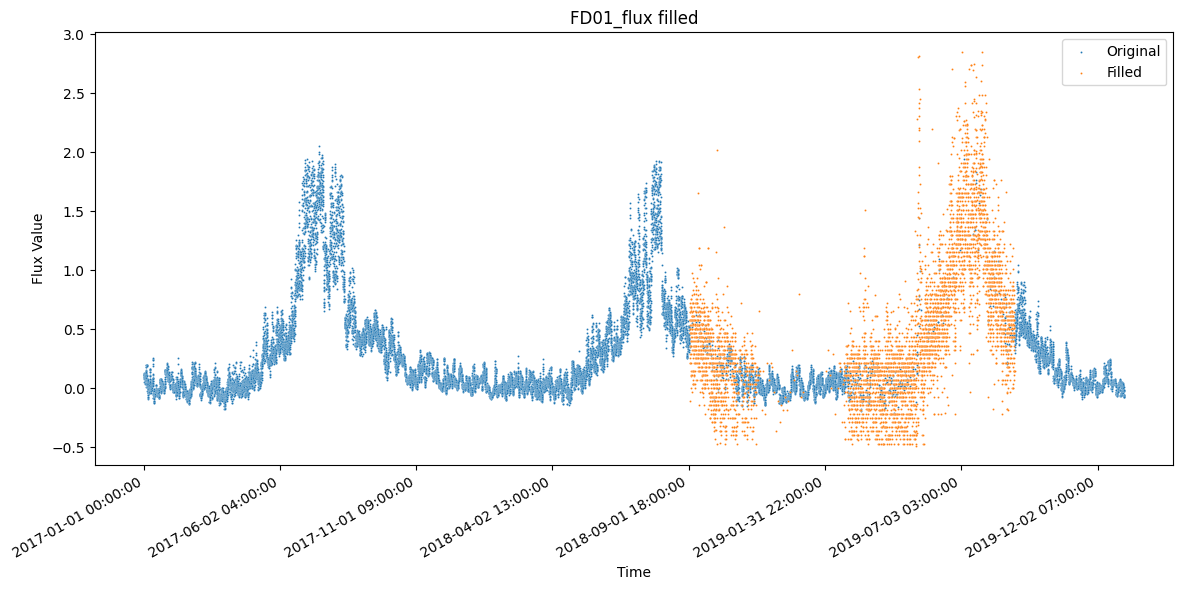

In [98]:
original_index_name = filled_data_original_masked.index.name
import seaborn as sns
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))
# Plot the 'Original' DataFrame
sns.scatterplot(data=filled_data_original_masked, x=original_index_name, y=data_filled_colname, 
                label='Original', ax=ax, s=2)
# Plot the 'Filled' DataFrame on the same axis
sns.scatterplot(data=dataset, x=original_index_name, y=SRS_CHAMBER, 
                label='Filled', ax=ax, s=2)

plt.title('{} filled'.format(SRS_CHAMBER))
plt.xlabel('Time')
plt.ylabel('Flux Value')

ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the legend
plt.legend()

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()

In [99]:
#Metrics
rmse = root_mean_squared_error(y_test, x_test_predict)
n_rmse = rmse/np.mean(y_test)
mae = mean_absolute_error(y_test, x_test_predict)
print (rmse, '\n', n_rmse, '\n', mae)

0.26816206880814275 
 0.5587706238740688 
 0.20606647753077514


In [100]:
save_dir = process.create_savedir(ROOT_DIR, site_tofill, SRS_CHAMBER)
# create output csv
filled_gap = filled_data_original_masked.reset_index()[data_filled_colname]
original = dataset.reset_index()[SRS_CHAMBER]
output = pd.concat([original, filled_gap], axis=1)

output\akb_FD01_flux__240816


In [105]:
# save to file
filename = data_filled_colname + '_slope' + str(slope) + '_rs' + str(r2) + '.csv'
print (filename)
output.to_csv(save_dir + '/' + filename)

FD01_flux_filled_slope1.001_rs0.788.csv


In [106]:
figname = data_filled_colname + 'slope' + str(slope) + '_rs' + str(r2) + '.jpeg'
fig.savefig(save_dir + '/' + figname)

In [107]:
# counting rows
n_obs_spring, n_obs_summer, n_obs_autumn, n_obs_winter = process.count_by_seasons(flux_df.dropna())
n_filled_spring, n_filled_summer, n_filled_autumn, n_filled_winter = process.count_by_seasons(x_predict)

# output log
output_log =  {'MODEL' : 'Random Forest',
            'SITE' : site_tofill,
            'SRS_CHAMBER' : SRS_CHAMBER,
            'FEATURES' : features,
            'RSQUARE' : r2,
            'SLOPE' : slope,
            'RMSE' : rmse,
            'N_RMSE' : n_rmse,
            'MAE' : mae,
            'start_t' : flux_df.index[0],
            'end_t' : flux_df.index[-1],
            'n_filled' : len(x_predict),
            'n_observed' : len(flux_df) - len(x_predict),
            'n_obs_spring' : n_obs_spring,
            'n_obs_summer' : n_obs_summer,
            'n_obs_autumn' : n_obs_autumn,
            'n_obs_winter' : n_obs_winter,
            'n_filled_spring' : n_filled_spring,
            'n_filled_summer' : n_filled_summer,
            'n_filled_autumn' : n_filled_autumn,
            'n_filled_winter' : n_filled_winter
        }
output_log

#save parameters
with open(os.path.join(save_dir, 'output_log.json'), 'w') as fp:
    json.dump(output_log, fp)
print ('done')

done
